Основную часть упражнений модуля мы будем выполнять на примере датасета, содержащего информацию о посещениях одного из ресторанов быстрого питания в США в начале 90-х годов. 

In [45]:
import  pandas as pd 
df = pd.read_csv('./data/tips.csv')
df.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Как видно из рисунка, датасет содержит семь показателей:

* total_bill — общая сумма, уплаченная за заказ;
* tip — размер чаевых;
* sex — пол клиента;
* smoker — является ли клиент курильщиком (в 90-е годы в ресторанах США были зоны для курящих);
* day — день недели;
* time — время (обед или ужин);
* size — количество посетителей, обедавших за столом.

Для быстрого и корректного отображения графиков, которые мы будем строить, запустите на работу магическую команду:

In [46]:
%matplotlib inline

In [50]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)

Эта команда позволит нам автоматически выводить на экран все графики и диаграммы без использования дополнительных функций.

### Общий синтаксис метода plot

Основным методом, который предлагает Pandas для быстрого создания простейших графиков и диаграмм, является метод plot. Примените этот метод к нашему датафрейму и посмотрите на результат:

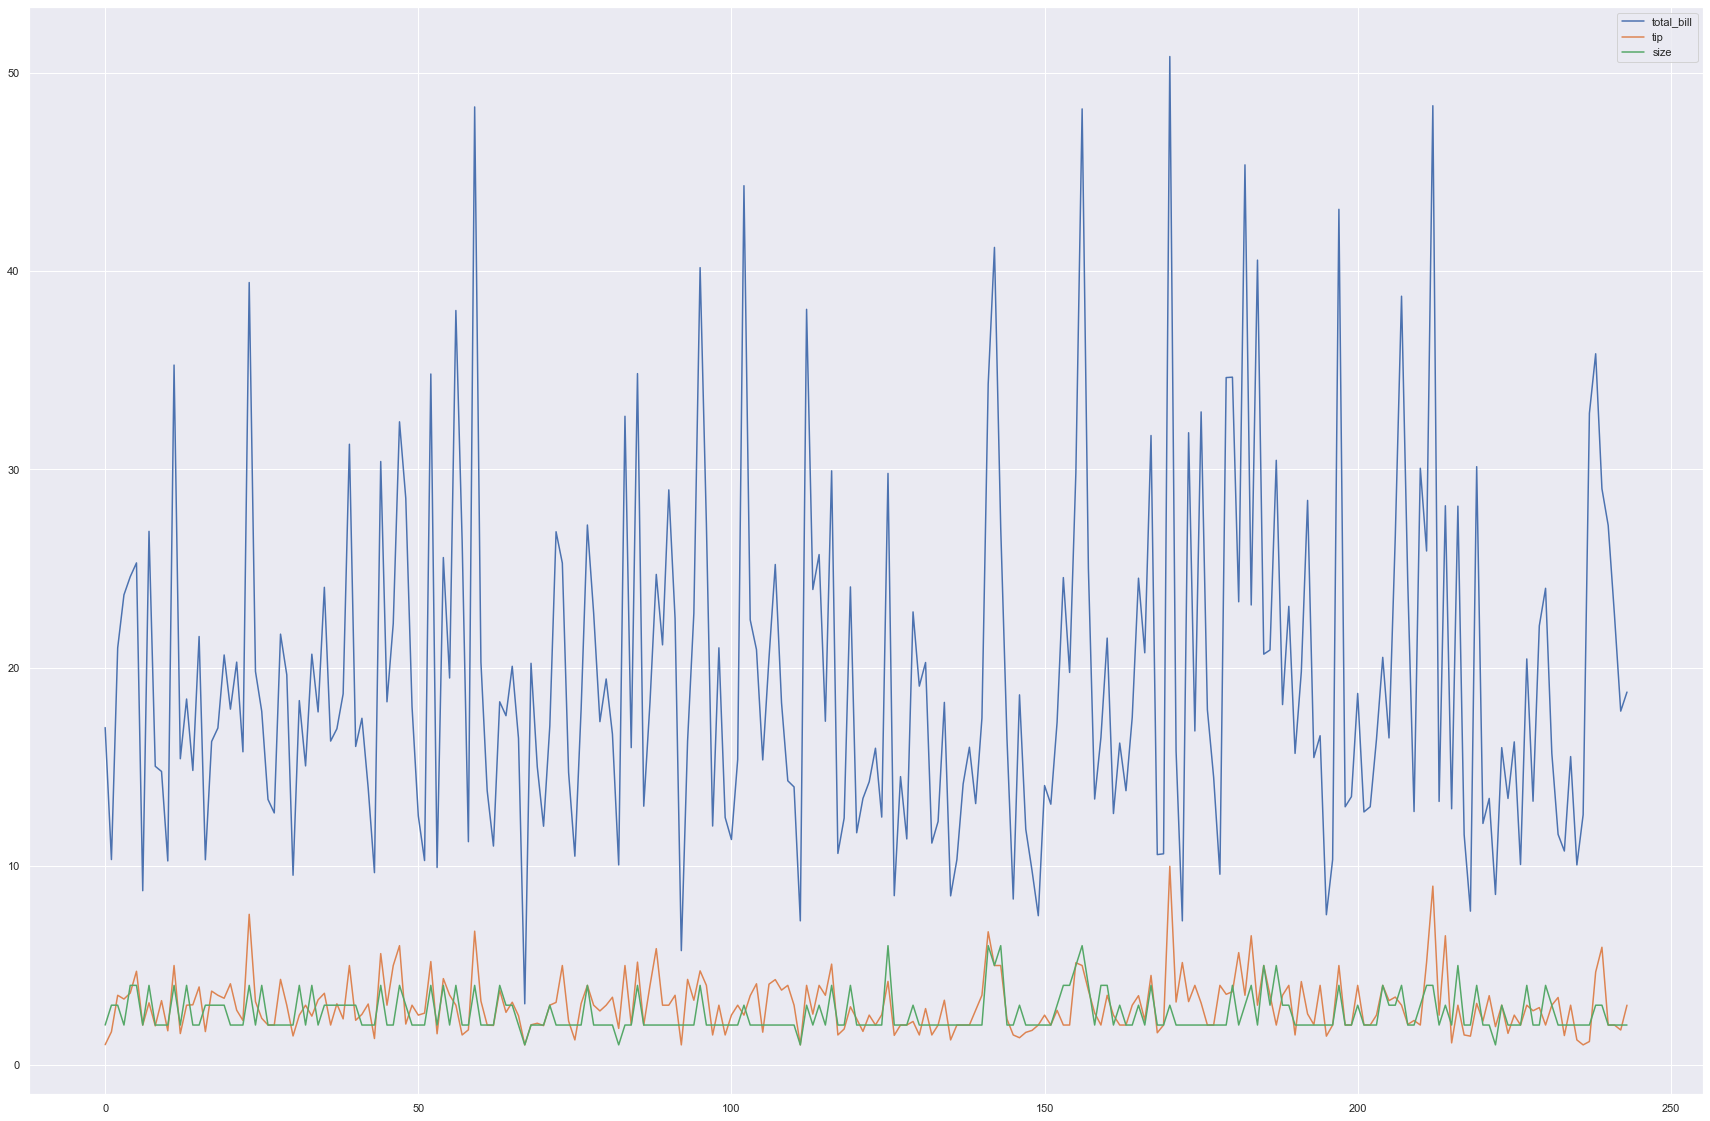

In [51]:
df.plot();

При обращении к методу plot без указания параметров компьютер построил графики для всех имеющихся в датафрейме количественных признаков. При этом на графике по оси х отложены порядковые номера данных в датафрейме (индексы), а по оси y — значения показателей.

## Настройка параметров метода

Если применить метод plot не ко всему датафрейму, а только к одному столбцу, а в качестве одного из параметров указать тип диаграммы (например, тип hist), то мы получим гистограмму распределения признака:

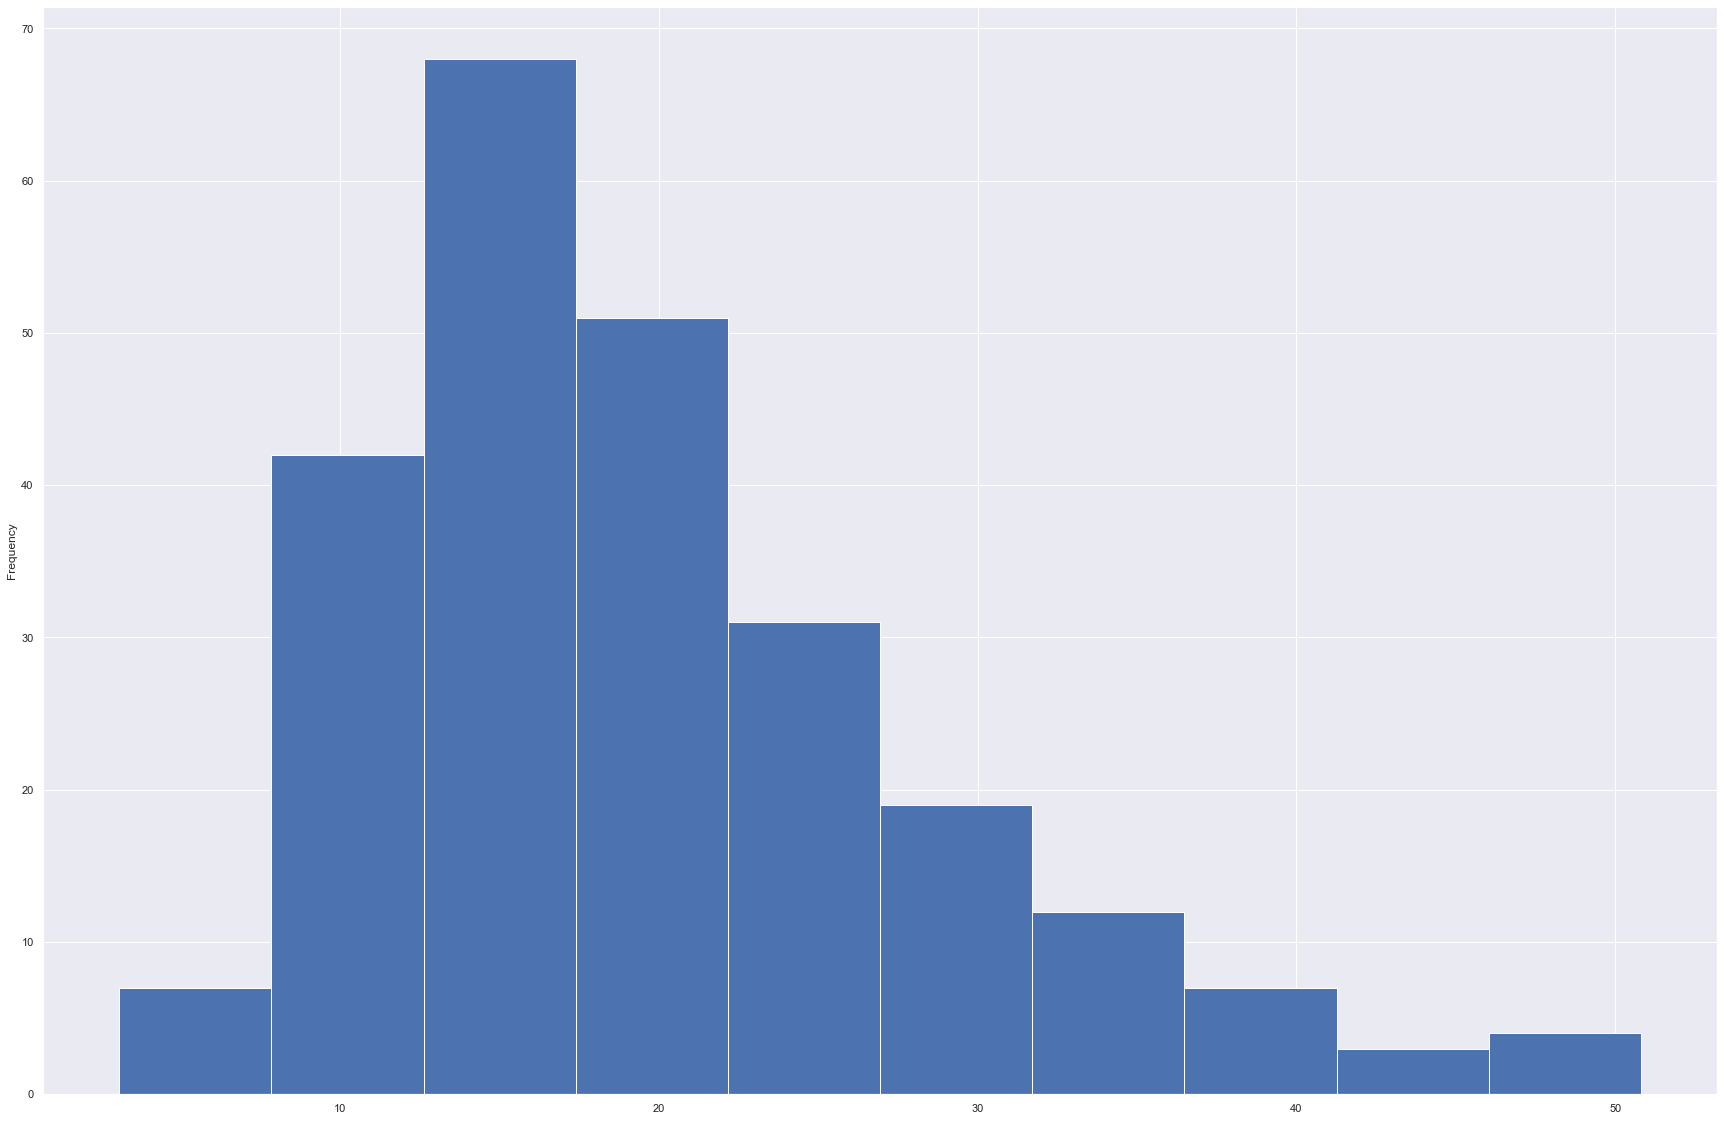

In [52]:
df['total_bill'].plot(kind='hist');

Добавление параметров grid и title дополнит отображаемую диаграмму еще несколькими деталями:

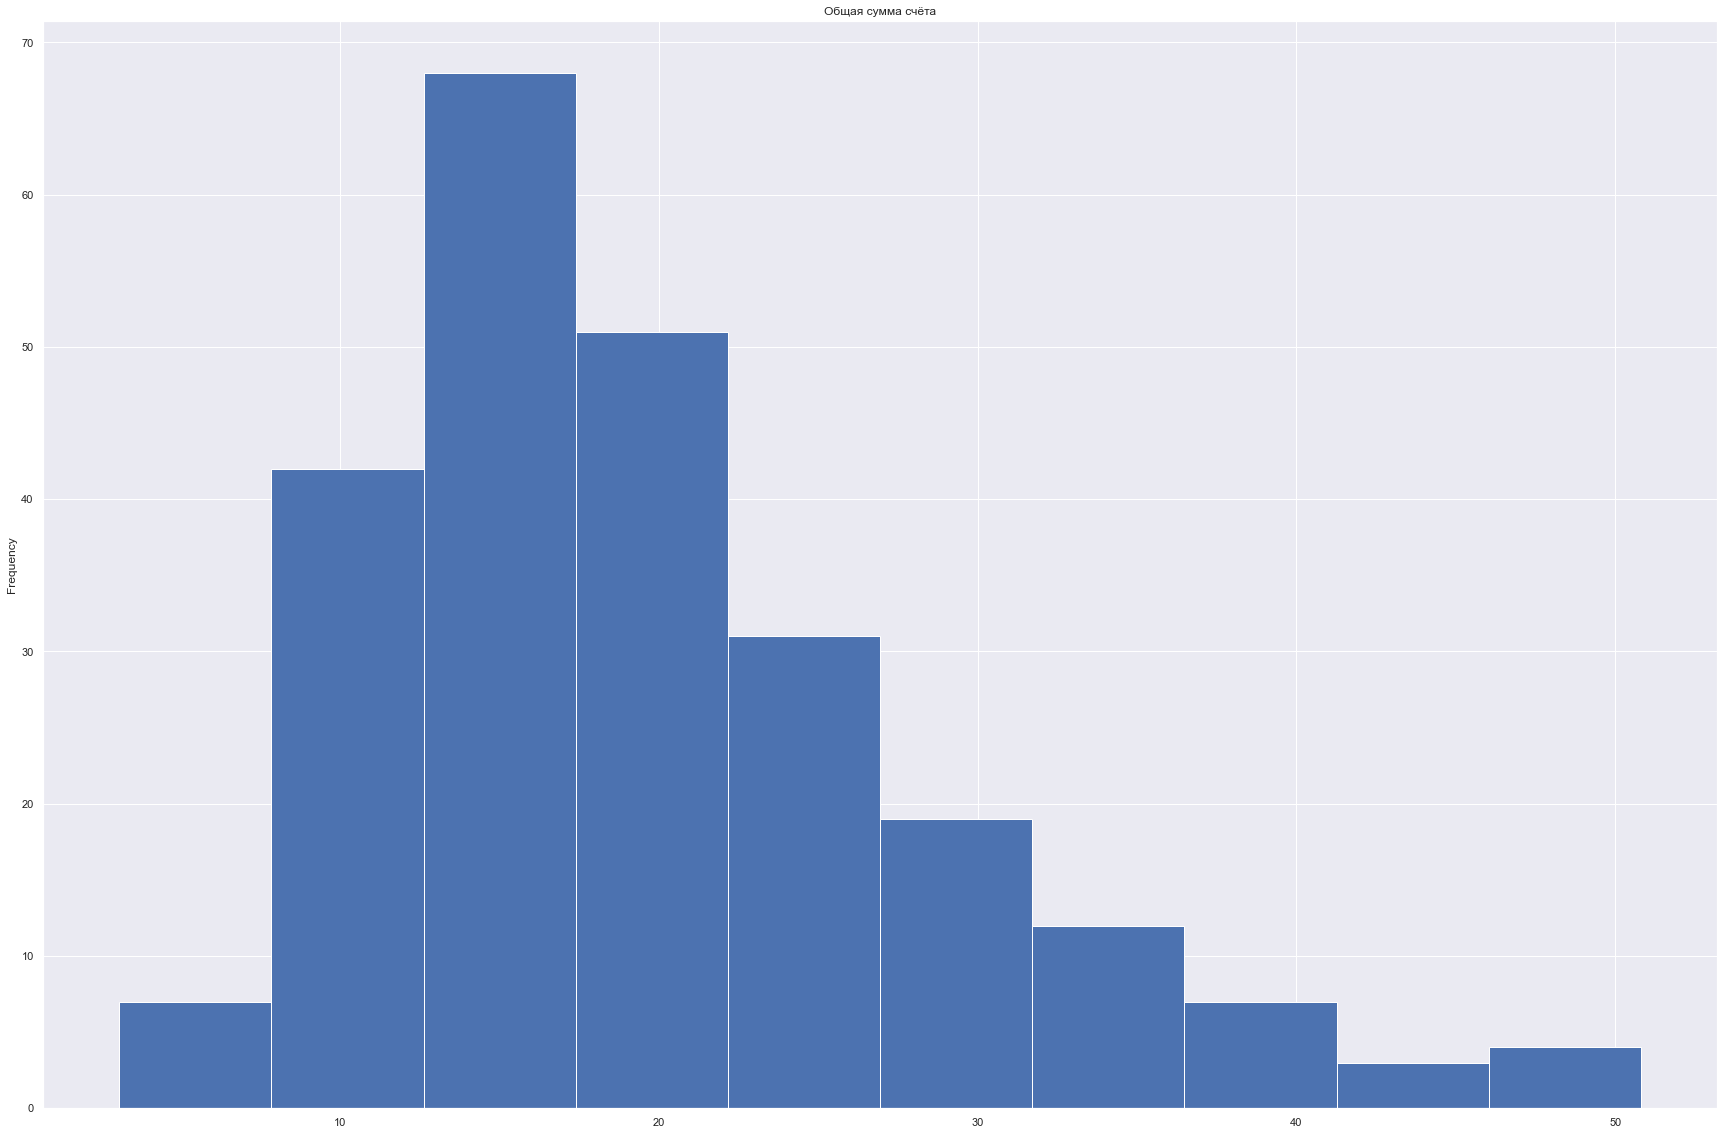

In [53]:
df['total_bill'].plot(kind='hist', 
                      grid=True, 
                      title='Общая сумма счёта');

Для работы с категориальными (нечисловыми) переменными с помощью метода hist датафрейм необходимо предварительно обработать. Например, если мы хотим увидеть распределение посетителей по дням недели, нужно предварительно посчитать, сколько заказов пришлось на каждый из дней недели. Сделать это можно с помощью метода value_counts(), а уже к получившемуся датафрейму применить метод plot. Тип графика, который мы будем использовать в этом случае, — bar (столбчатая диаграмма). Чтобы все столбцы были одного цвета, введём параметр colormap со значением coolwarm:

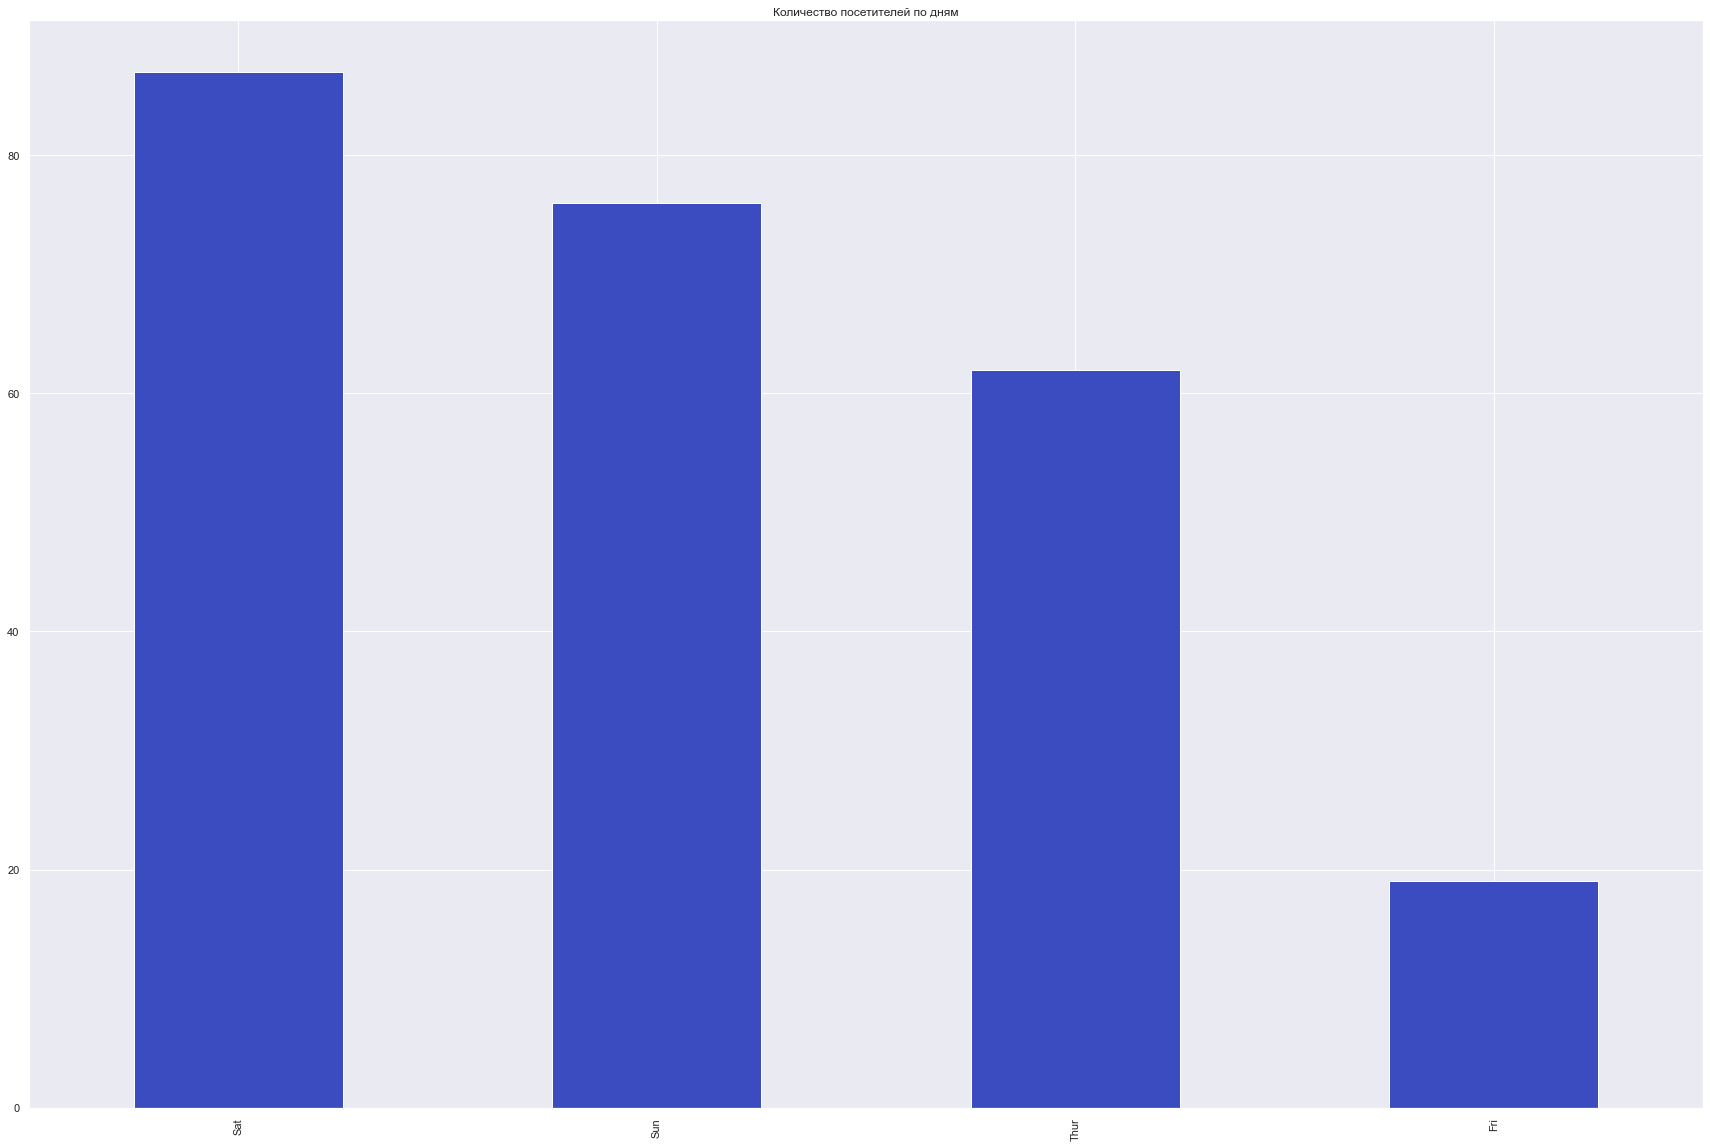

In [54]:
df['day'].value_counts().plot(kind='bar', 
                              grid=True, 
                              colormap='coolwarm', 
                              title='Количество посетителей по дням');

### Напишите код для получения следующего графика:

<img src="https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/pic/plot_test.png" >

### Отображение двух показателей на графике
Метод plot позволяет использовать параметр subplots, который принимает логические значения True или False. При установке значения True можно разместить несколько графиков в одной рабочей области:

array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

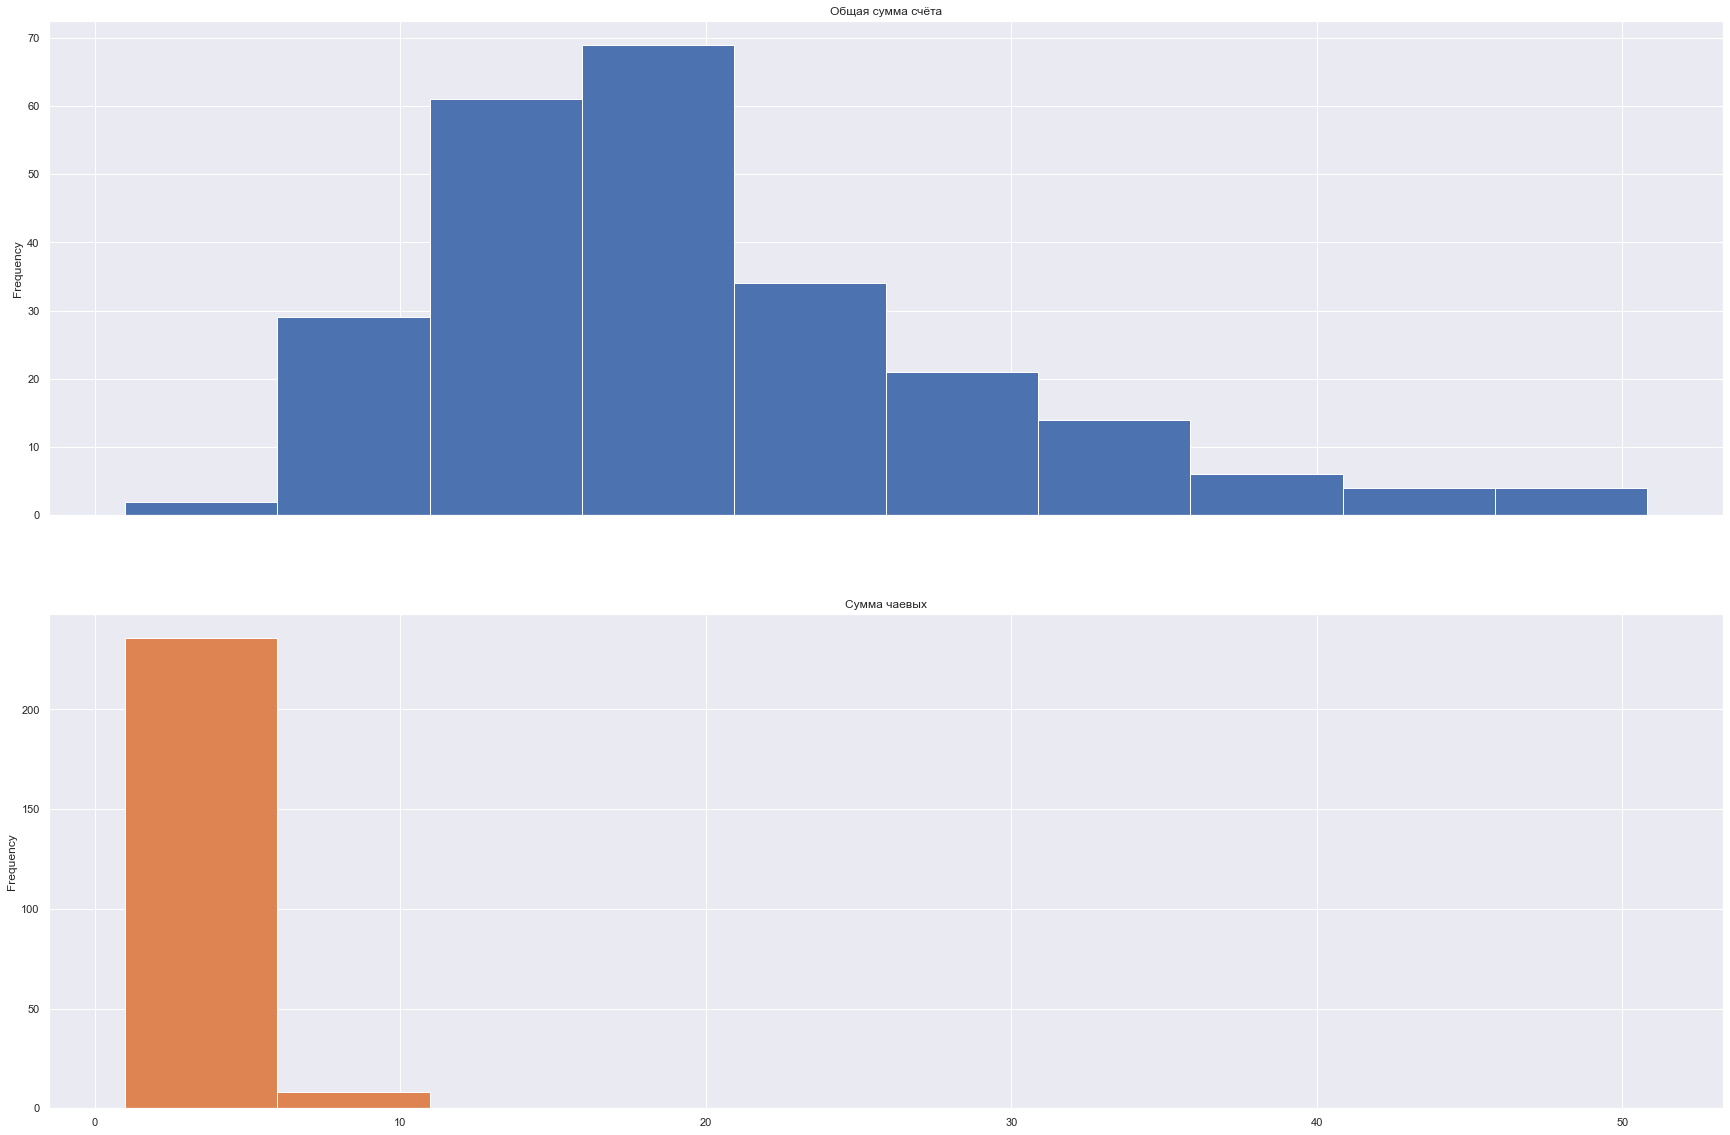

In [55]:
df[['total_bill', 'tip']].plot(kind='hist', 
                               grid=True, 
                               subplots=True, 
                               title=['Общая сумма счёта', 'Сумма чаевых'], 
                               legend=False)

Такой вариант отображения графиков показывает, в каких пределах изменяются оба признака, но ничего не говорит о том, есть ли какая-то связь между суммой по счёту и суммой чаевых. Для получения такой информации мы можем построить график типа scatter plot:

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

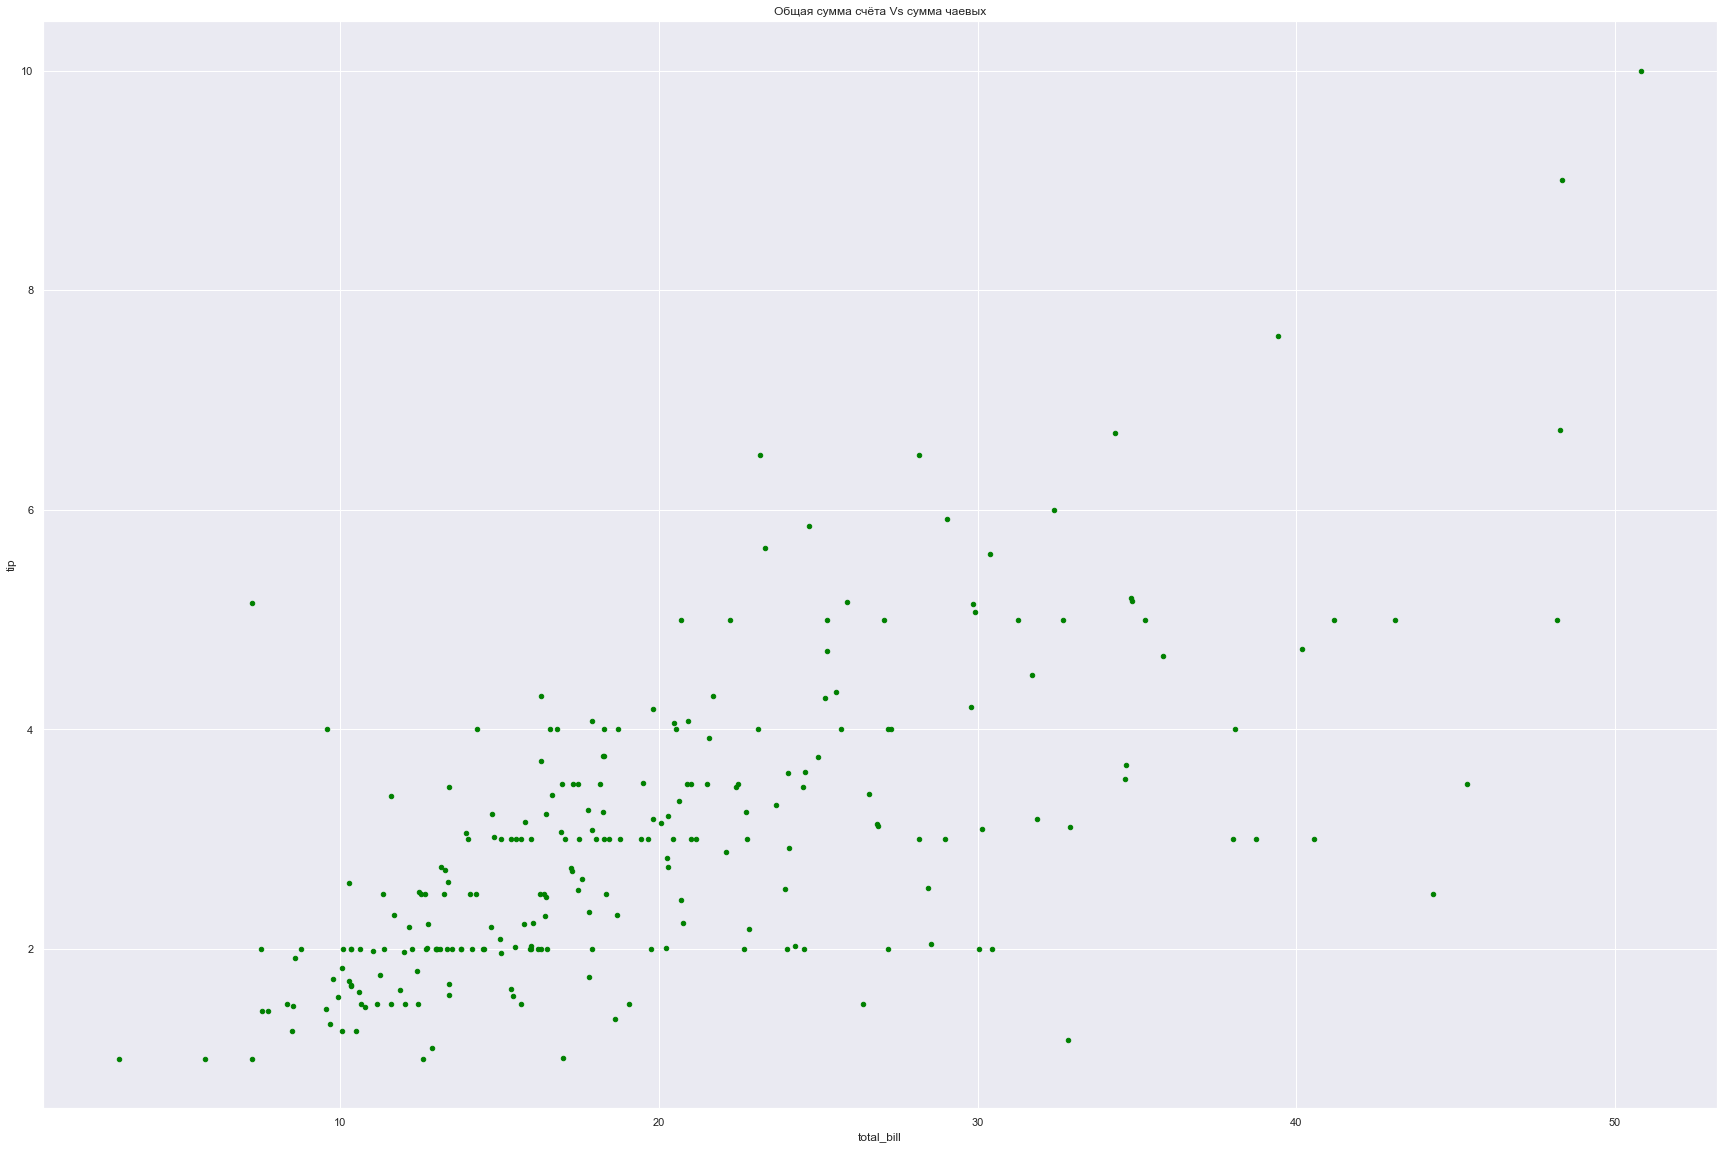

In [56]:
df.plot(x='total_bill', 
        y='tip', 
        color="green",
        kind='scatter',         
        grid=True, 
        title='Общая сумма счёта Vs сумма чаевых')

# разделить цвета

На этом графике видна тенденция, что более щедрые чаевые обычно оставляют посетители, которые делают более дорогие заказы, а также видны исключения из правила.

Если нам нужно совместить на графике несколько качественных и количественных показателей, то датафрейм следует предварительно обработать. 

Например, если мы хотим отобразить средние значения суммы счёта и размера чаевых по дням недели, то потребуется такой код:

In [57]:
df.pivot_table(values=['total_bill', 'tip'], index='day', aggfunc='mean')

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


<AxesSubplot:xlabel='day'>

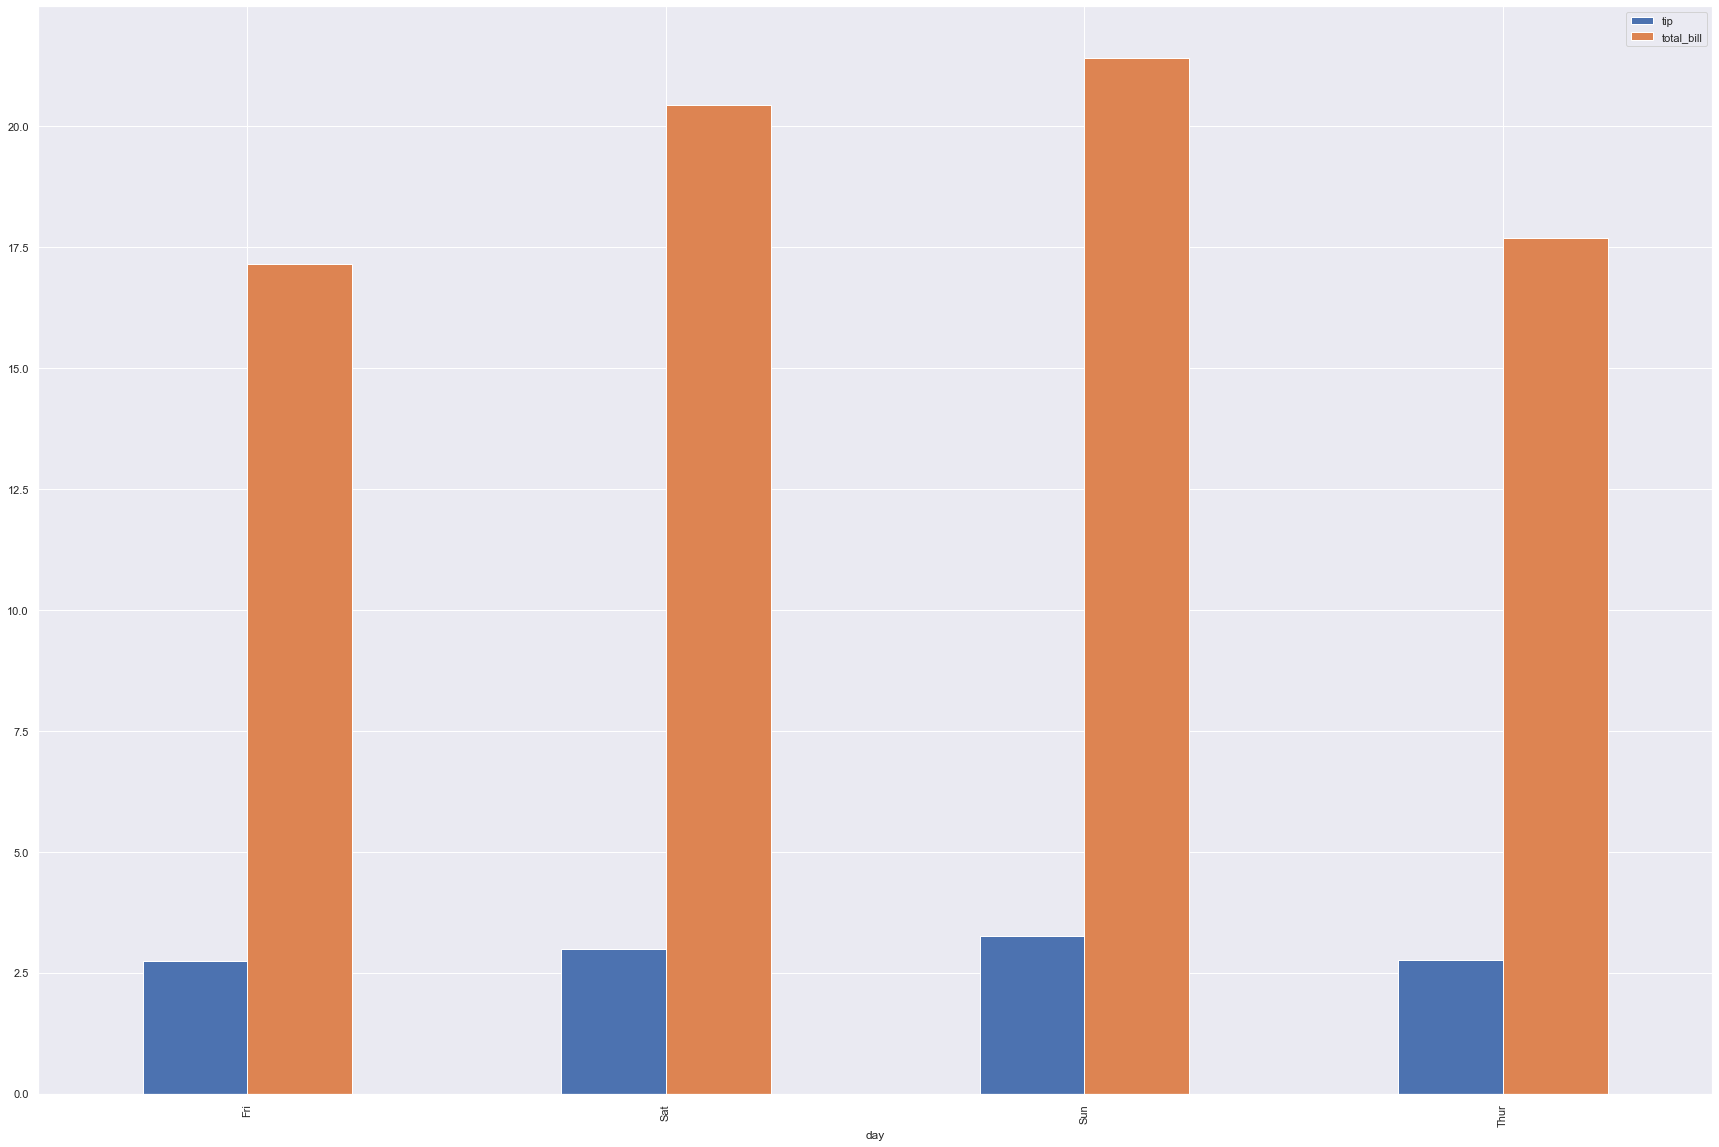

In [58]:
df.pivot_table(values=['total_bill', 'tip'], index='day', aggfunc='mean').plot(kind='bar')

### Объектно-ориентированный подход

Matplotlib — это библиотека Python, обладающая широкими возможностями для создания и отображения графической информации. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/tips.csv')
df.head()

Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу.

Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты. В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создается координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает все отведенное место в области (ширина и высота равны 1).

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

Теперь мы можем разместить в созданной нами координатной плоскости любую графическую информацию. Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод [hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist):

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

* axes.set_title — заголовок диаграммы;
* axes.set_ylabel — заголовок для оси ординат;
* axes.set_xlabel — заголовок для оси абсцисс.

[Посмотрите](https://matplotlib.org/api/axes_api.html?highlight=axes#module-matplotlib.axes) полный список методов к объекту axes в официальной документации.

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Для размещения на координатной плоскости графиков других видов, необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания scatter plot, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом [scatter](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter):

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

С помощью параметра marker можно настроить форму маркеров, используемых для отображения каждого индивидуального случая. [Посмотрите](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers) другие варианты форм маркеров.

### Несколько систем координат

Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это отступ снизу и слева, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

In [ ]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

В основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

### Создание вспомогательного графика

Работу по размещению двух графиков в одном объекте начнём с создания вспомогательного датафрейма, содержащего информацию о минимальной и максимальной сумме счёта по дням недели:

In [ ]:
tips_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

* к объекту main_axes применим метод hist;
* для объекта insert_axes используем метод [bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar).

In [ ]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'])

В коде используется новый для нас приём: для добавления в систему координат каждого типа столбцов мы отдельно применяем метод bar, указывая разные значения параметра height:

Недостатком графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar:

In [ ]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
                width = -0.4, align = 'edge')

Параметр align указывает, следует ли размещать столбцы для отображения каждого значения в центре (align = 'center', используется по умолчанию) или необходимо сместить их к краю (align = 'edge') . С помощью параметра width мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону (работает, если align = 'edge'):

### Добавление легенды

Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], 
         width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], 
         width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

Чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода set_ylim к объекту axes:

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = tips_per_day['day'], height = tips_per_day['max'], width = 0.4, align = 'edge', label = "Максимальная сумма чека")
axes.bar(x = tips_per_day['day'], height = tips_per_day['min'], width = -0.4, align = 'edge', label = "Минимальная сумма чека")
axes.legend(loc = 1)

### Subplots

Разместить в одном пространстве несколько графиков можно и с помощью метода subplots. В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

После выполнения кода переменная axes содержит список, состоящий из трех объектов. Обращаться к элементам списка можно по индексам (от 0 до 2):

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счёта')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма счёта Vs Cумма чаевых')

### Создание линейных графиков

Для выполнения заданий этого блока мы будем использовать не датасет, а специально сгенерированный одномерный массив NumPy. Для генерации массива нам необходимо импортировать библиотеку NumPy:

In [ ]:
import numpy as np 

Теперь сгенерируем массив из 1000 чисел, равномерно распределённых в интервале от -3 до 3. Также создадим переменную, содержащую значения функции e^x на отрезке [-3, 3]:

In [ ]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

### Отрисовка одной кривой

Функция [plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) позволяет отрисовать последовательность значений — первым аргументом подается последовательность чисел аргумента, вторым — последовательность значений функции для каждого аргумента:

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1) 

### Отрисовка нескольких кривых

Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. В таком случае отрисовка выполнится в том же matplotlib.pyplot.figure, который в данном случае создался автоматически при первой отрисовке. Для примера добавим к нашему графику какой-нибудь полином третьей степени:

In [ ]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

Обратите внимание, полученным графикам назначены разные цвета. Эти цвета берутся из палитры по умолчанию и всегда назначаются в одном и том же порядке при добавлении новых графиков.

### Стили линий

Воспользуемся функцией [figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) для создания фигуры заданного размера. Размер фигуры задается в дюймах. При этом для отображения на реальном дисплее количество пикселей определяется за счет установленного dpi — dots per inch (по умолчанию 100).

При визуализации большого объема данных часто приходится выделять те или иные графики. Как и при написании текстов, это можно сделать с помощью форматирования. Форматирование линии определяется стилем отрисовки, маркировкой или и тем и другим одновременно. Описание возможных стилей и маркеров можно посмотреть в [документации](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

Отрисуем линию в стиле "dashed line":

In [ ]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1, linestyle='--')

### Цвета и маркеры

Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker).

Остальные цвета и маркеры можно посмотреть в [документации](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html):

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[::30], y2[::30], 'mD')

### Гистограммы распределения признаков

[Seaborn](http://seaborn.pydata.org/index.html) — графическая библиотека с большими функциональными возможностями, позволяющая создавать разные типы графиков и использовать расширенные настройки при оформлении. Многие функции Seaborn интегрируются с библиотекой Matplotlib, что создает дополнительные возможности для творчества при визуализации данных.

Импортируем библиотеки Seaborn, Matplotlib и Pandas для работы с датафреймами и корректного отображения информации в jupyter notebook:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

При использовании некоторых методов Seaborn система может выдавать предупреждающие сообщения, что метод применяется к определенному типу данных. Эти предупреждения не являются сообщениями об ошибках, их можно игнорировать и отключить выведение на экран:

In [ ]:
import warnings; warnings.simplefilter('ignore')

Загружаем датасет:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/tips.csv')
df.head()

Для построения гистограммы распределения количественных признаков в библиотеке Seaborn используется метод [distplot](http://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot). Перед применением метода установим стандартные параметры отображения графиков с помощью команды [sns.set()](http://seaborn.pydata.org/generated/seaborn.set.html?highlight=set#seaborn.set):

In [ ]:
sns.set()
sns.distplot(df['total_bill'])

Seaborn позволяет разместить на одном графике гистограммы распределения двух признаков и показать связь между ними. Тип графика, используемый для этого, называется [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot):

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=df)

Характер представления информации в центральной части графика можно регулировать с помощью параметра kind. 

Например, kind = 'reg' выводит на экран не только точки, представляющие данные об отдельных посещениях ресторана, но и линию регрессии, выражающую общий характер связи между двумя величинами:

In [ ]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

Другой быстрый и наглядный способ отобразить гистограммы распределения количественных признаков и особенности связей между ними — построить график типа [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot).

In [ ]:
sns.pairplot(df, plot_kws={'alpha': 0.5})

### Работа с категориальными признаками

Для отображения информации о качественных признаках на диаграммах по методам библиотек Pandas и Matplotlib приходится предварительно обрабатывать датафрейм, группируя нужные данные. 

В Seaborn такой проблемы нет: при построении графиков можно обращаться к столбцам с категориальными признаками напрямую. Для построения гистограммы распределения категориального признака можно воспользоваться методом [countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot):

In [ ]:
sns.countplot(x='day', data=df)

Категориальные значения при построении графиков можно использовать в качестве одного из параметров метода [barplot](http://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot). Он позволяет разделить датафрейм на группы в зависимости от значения категориальной переменной. По умолчанию для каждой группы вычисляется среднее значение заданной количественной переменной. Вместо среднего значения можно вычислить и любую другую статистическую характеристику, наименование которой задается в параметре estimator.

In [ ]:
sns.barplot(x='sex', y='total_bill', data=df)

График показывает, что средний чек, оплаченный клиентами-мужчинами немного больше, чем средний чек клиентов женского пола.

### Boxplots

Box plot — тип графика, компонентами которого являются:

* Отрезок (Range), отражающий диапазон значений набора данных
* Прямоугольник (Box) — отображает границы основного объема данных. Левой границей считается значение 25%-ый квантиля, или Q1, первый квартал. Правой границей является 75%-ый квантиль, или Q3, третий квартал)
* Усы (whiskers) — отметки на оси, представляющие левый и правый "крайние" значения данных. Фактически эти значения не всегда являются минимумом или максимумом набора. Они представляют значения, отстоящие на 1.5*IQR влево или вправо от левой (Q1) или правой (Q2) границы соответственно. Здесь IQR - Interquartile Range (межквантильный диапазон) — ширина прямоугольника от Q1 до Q3
* Выбросы (Outliers) — значения, находящиеся за левым и правым "крайними" значениями на оси

<img src="https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/pic/boxplot.png" >

Для создания графиков такого типа в Seaborn используется метод [boxplot](http://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot). Он позволяет отобразить распределение заданного количественного признака по категориям, которые определяются значением заданного качественного признака. На диаграмме ниже показывается, как менялась сумма чаевых в зависимости от дня недели:

In [ ]:
sns.boxplot(x='day', y='tip', data=df)

Еще один способ увеличения информативности методов Seaborn — использование параметра hue. Он позволяет дополнительно разделять отображаемые данные в зависимости от значения нового категориального признака. Посмотрите, как меняется отображение boxplot при добавлении параметра hue:

In [ ]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

Такой способ представления информации позволяет нам увидеть, как изменялось распределение сумм чаевых в разные дни недели в зонах для курящих и некурящих гостей ресторана.

### Графики табличного типа

Степень связи между двумя величинами в Seaborn помогает оценить корреляционный анализ. Величина степени связи (коэффициент корреляции) может меняться от -1 до +1: чем ближе абсолютное значение коэффициента к единице, тем сильнее связь между признаками.

Для отображения информации о результатах корреляционного анализа в Seaborn часто используются тепловые карты ([heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)).  Рассмотрим, как создать такую карту. Сначала вычислим коэффициенты корреляции между количественными признаками, содержащимися в датафрейме, с помощью метода corr(). Результат вычислений сохраним в новом датафрейме correlation:

In [ ]:
correlation = df.corr()

Теперь мы можем передать созданный датафрейм с коэффициентами в качестве одного из параметров метода heatmap. Для отображения в тепловой карте значений коэффициентов корреляции зададим параметр annot = True. Для использования более ярких цветов при заливке ячеек применяем цветовую палитр

In [ ]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')